In [2]:
import json
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [3]:
with open('../data/cadec/train.json','r') as fp:
    train_data = json.load(fp)

with open('../data/cadec/test.json','r') as fp:
    test_data = json.load(fp)

In [4]:
# report on the entity types
# report on the number of ners and sentences
# report on the distribution 
def report_statistics(data):
    ner_num = 0 # the ner entity total numbers
    entity_type = set()
    ner_sentence_list = [] # the entity number distribution list, list size: sentence number
    word_ner_list = [] # the word number distribution list, list size: the entity number
    for s_data in data:
        ners = s_data['ner']
        ner_num += len(ners)
        ner_sentence_list.append(len(ners))
        for i in range(len(ners)):
            type = ners[i]['type']
            entity_type.add(type)
            word_ner_list.append(len(ners[i]['index']))
    print("The types for the training set:", entity_type)
    print("The total number of sentences:", len(data))
    print("The total number of entities: ", ner_num)
    print("The distribution for the entity number in a sentence:")
    print("The average:", np.mean(ner_sentence_list), "The std:", np.std(ner_sentence_list))
    # plt.hist(ner_sentence_list, bins=40)
    # plt.xlabel('entity number in a sentence')
    # plt.ylabel("frequency")
    # plt.show()
    print("The distribution for the token number in a entity:")
    print("The average:", np.mean(word_ner_list), "The std:", np.std(word_ner_list))
    # plt.hist(word_ner_list, bins=40)
    # plt.xlabel("token number in an entity")
    # plt.ylabel("frequency")
    # plt.show()

    return ner_sentence_list, word_ner_list

In [5]:
print('--------------train--------------')
train_entity_sentence, train_word_entity = report_statistics(train_data)
print('--------------test----------------')
test_entity_sentence, test_word_entity = report_statistics(test_data)

--------------train--------------
The types for the training set: {'ADR'}
The total number of sentences: 5340
The total number of entities:  4428
The distribution for the entity number in a sentence:
The average: 0.8292134831460675 The std: 1.639644766989357
The distribution for the token number in a entity:
The average: 2.7538392050587173 The std: 2.0856591209315423
--------------test----------------
The types for the training set: {'ADR'}
The total number of sentences: 1160
The total number of entities:  990
The distribution for the entity number in a sentence:
The average: 0.853448275862069 The std: 1.7711982615753021
The distribution for the token number in a entity:
The average: 2.735353535353535 The std: 2.0958503074829533


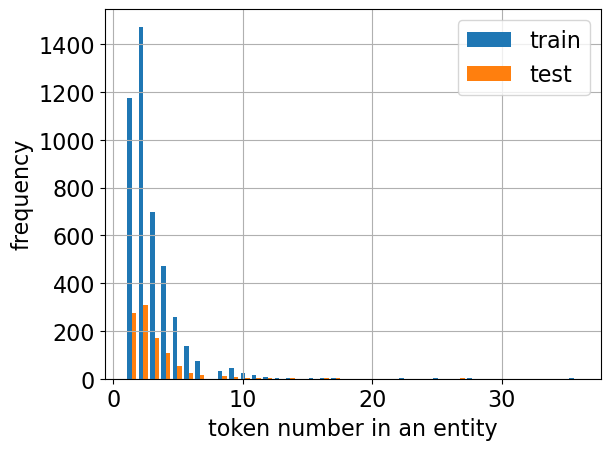

In [6]:
matplotlib.rcParams.update({'font.size': 16})
plt.hist([train_word_entity, test_word_entity], bins=40, label=['train', 'test'])
plt.xlabel("token number in an entity")
plt.ylabel("frequency")
plt.grid()
plt.legend()
plt.show()

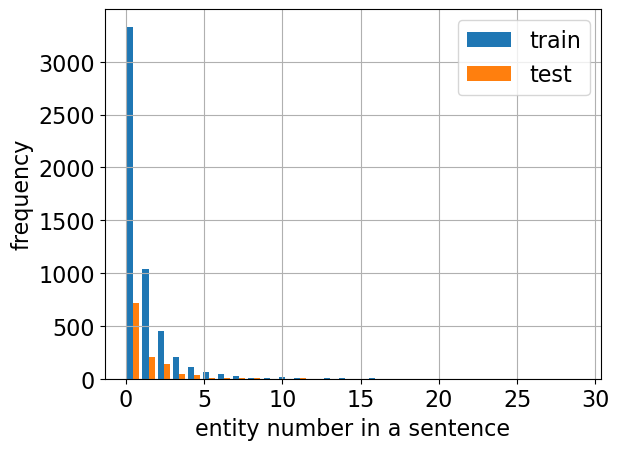

In [7]:
matplotlib.rcParams.update({'font.size': 16})
plt.hist([train_entity_sentence, test_entity_sentence], bins=30, label=['train', 'test'])
plt.xlabel("entity number in a sentence")
plt.ylabel("frequency")
plt.grid()
plt.legend()
plt.show()

In [8]:
idx = 3
print(train_data[idx]['sentence'])
print(train_data[idx]['ner'])

['Muscle', 'aches', 'and', 'weakness', 'in', 'neck', ',', 'arms', ',', 'shoulders', ',', 'upper', 'back', ',', 'legs', '.']
[{'index': [0, 1], 'type': 'ADR'}, {'index': [3, 4, 5], 'type': 'ADR'}, {'index': [3, 4, 11, 12], 'type': 'ADR'}, {'index': [3, 4, 7], 'type': 'ADR'}, {'index': [3, 4, 9], 'type': 'ADR'}, {'index': [3, 4, 14], 'type': 'ADR'}]


In [20]:
idx = 5
print(train_data[idx]['sentence'])
print(train_data[idx]['ner'])

['Pain', 'and', 'weakness', 'increased', 'until', 'I', 'needed', 'help', 'dressing', 'and', 'combing', 'my', 'hair', '.']
[{'index': [0], 'type': 'ADR'}, {'index': [2], 'type': 'ADR'}]
